# Wallermat
_Walmart runs several promotional markdown events throughout the year. These 
markdowns precede prominent holidays, the four largest of all, which are the 
Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these 
holidays are weighted five times higher in the evaluation than non-holiday weeks. 
Part of the challenge presented by this assignment is modeling the effects of 
markdowns on these holiday weeks in the absence of complete/ideal historical 
data. Historical sales data for 45 Walmart stores located in different regions are 
available._


In [2]:
#First step let's put our needed modules in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import warnings as wn
wn.filterwarnings("ignore")
sns.set_style("darkgrid")

In [3]:
# Please check that your input true
walmart = pd.read_csv(r"C:\Users\BLU-RAY\Desktop\Data metho project\walmart.csv")
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## __Next step is to Know the environment of our data__ 

In [4]:
# Return first 5 elements of data
print(walmart.head(),"_"*80,sep="\n")
# Discription of our data
print(walmart.describe(),"_"*80,sep="\n") 
# Some information about our data types
print(walmart.info(),"_"*80,sep="\n")
# Some check if there's nullity in data
print(f"null values = \n{walmart.isnull().sum()}","_"*80,sep="\n")
# Some check if there's any duplication
print(f"Number of duplication : {walmart.duplicated().sum()}","_"*80,sep="\n")
# Return last 5 elements of data
print(walmart.tail(),"_"*80,sep="\n")

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
________________________________________________________________________________
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049  

In [5]:
#Let's first step to change the type of date and then check the info again
walmart.Date = pd.to_datetime(walmart.Date)
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## By this check we have noticed that this data is totally cleaned and there's no any null or even any value need to get changed
#### _maybe the column who need to be checked is tempreture bassed on the kind of it "If it's kelvin so it needs to be celsius" or "If it's celsius then it's true"_
#### ___Next step is to see to analyze this data and put some columns will help us to reach our insights___

In [6]:
# First step to seprate all date 
walmart["Day"] = walmart.Date.dt.day
walmart["Month"] = walmart.Date.dt.month
walmart["Year"] = walmart.Date.dt.year
# Need to put Seasons to know which of summer or winter or even any of the 4 is the best one to make offers in this period
season_month_south = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
walmart["Season"] = walmart["Month"].map(season_month_south)
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Autumn
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,Winter
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Autumn


### **Some visualize for the important quantitive variables distributions in our data "Weekly sales , Fuel price , CPI , Tempreature and Unemployment"**

Text(0.5, 1.0, 'CPI Distribution')

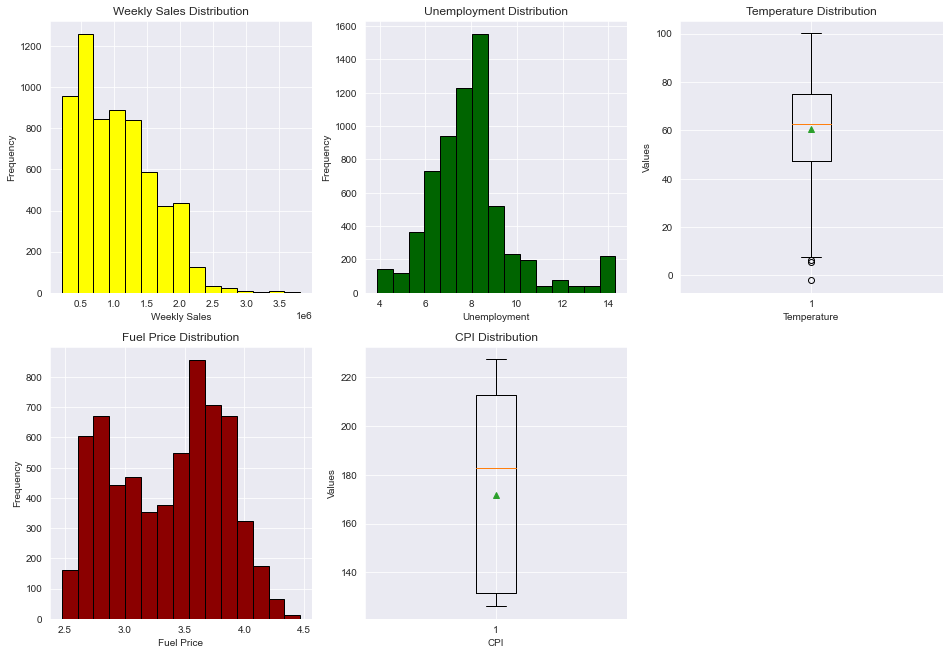

In [7]:
# Let's see the environment of our data based on some Vizs
fig,ax=plt.subplots(2,3,figsize=(16,11))
ax[1,2].set_visible(False)
ax[0,0].hist(x=walmart["Weekly_Sales"],bins=15,color="yellow",edgecolor="Black")
ax[0,0].set_xlabel("Weekly Sales")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Weekly Sales Distribution")
ax[0,1].hist(x=walmart["Unemployment"],bins=15,color="darkgreen",edgecolor="Black")
ax[0,1].set_xlabel("Unemployment")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Unemployment Distribution")
ax[0,2].boxplot(x=walmart["Temperature"],showmeans=True)
ax[0,2].set_xlabel("Temperature")
ax[0,2].set_ylabel("Values")
ax[0,2].set_title("Temperature Distribution")
ax[1,0].hist(x=walmart["Fuel_Price"],bins=15,color="darkred",edgecolor="Black")
ax[1,0].set_xlabel("Fuel Price")
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_title("Fuel Price Distribution")
ax[1,1].boxplot(x=walmart["CPI"],showmeans=True)
ax[1,1].set_xlabel("CPI")
ax[1,1].set_ylabel("Values")
ax[1,1].set_title("CPI Distribution")

# a) Which store has maximum sales ?
__to perform this topic we need to make pivoting between stores and sum of weekly sales to know who has the most sales between all weeks__


       Weekly_Sales
Store              
20     3.013978e+08


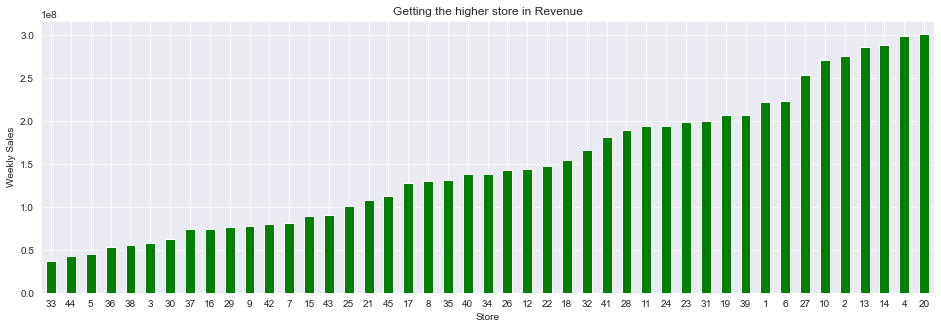

In [20]:
Store_With_Maximum_Sales = walmart.groupby("Store")["Weekly_Sales"].agg(np.sum).to_frame().sort_values(by="Weekly_Sales")
Store_With_Maximum_Sales.plot(kind="bar",
                              rot="360",
                              figsize=(16,5),
                              color="Green",
                              title="Getting the higher store in Revenue",
                              xlabel="Store",ylabel="Weekly Sales",legend=False)
print(Store_With_Maximum_Sales[Store_With_Maximum_Sales.Weekly_Sales==max(Store_With_Maximum_Sales.Weekly_Sales)])

### Then the highest in Weekly sales was Store number ___20___

# b) Which store has maximum standard deviation i.e., the sales vary a lot
__To perform this topic we need to pivot between Store and the variance in sales__ 

,Weekly_Sales
Store,
14,317569.949476


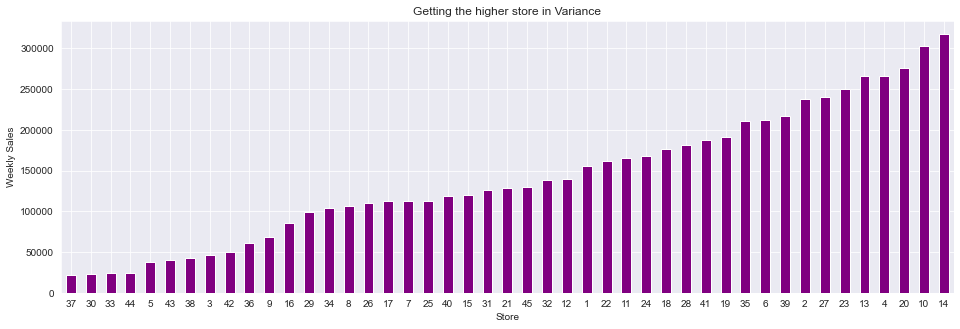

In [9]:
S_With_Varianced_Weekly_Sales = walmart.groupby("Store")["Weekly_Sales"].agg(np.std).to_frame().sort_values(by="Weekly_Sales")
S_With_Varianced_Weekly_Sales.plot(kind="bar",
                                       rot=360,
                                       figsize=(16,5),
                                       color="Purple",
                                       title="Getting the higher store in Variance",
                                       xlabel="Store",ylabel="Weekly Sales",legend=False)
S_With_Varianced_Weekly_Sales[S_With_Varianced_Weekly_Sales.Weekly_Sales==max(S_With_Varianced_Weekly_Sales.Weekly_Sales)]

### Then the store who has a great vary in the sales is store Number ___14___

# C) Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together
#### First try
**To perform that one then we need for Holiday flag , as 0 tends to non-holiday and 1 tends to holiday , and will make comparison between it and the weekly sales,Then get the stores with Negative Impact with Holidays**
#### Second Try
**Get Real Date from Kaggle and make Compare by equaling it with the same date in data and extract mean of each one then gain the insight easily**


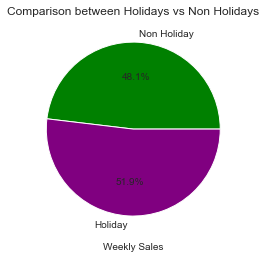

In [10]:
# Simple comparison between mean of Holidays vs Non holidays
Holiday_Vs_Non_Holiday_mean = walmart.groupby("Holiday_Flag")["Weekly_Sales"].agg(np.mean).to_frame()
plt.pie(data=Holiday_Vs_Non_Holiday_mean,labels=["Non Holiday","Holiday"],x="Weekly_Sales",
        autopct="%0.1f%%",colors=["Green","Purple"])
plt.title("Comparison between Holidays vs Non Holidays")
plt.xlabel("Weekly Sales")
plt.show()

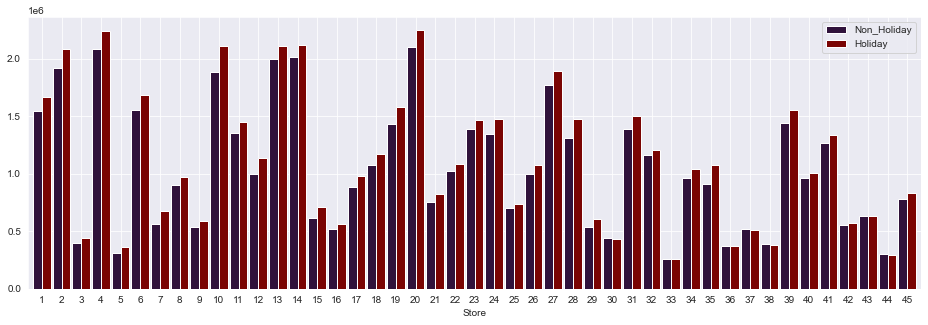

In [18]:
# First Try
Negative_Impact = pd.pivot_table(walmart,index="Store",columns="Holiday_Flag",values="Weekly_Sales",aggfunc=np.mean)
Negative_Impact.columns = ["Non_Holiday","Holiday"]
Negative_Impact.plot(kind="bar",figsize=(16,5),rot=360,width=0.9,colormap="turbo")
plt.show()

### Then The store "30,36,37,38 and 44" Have a bad impact in revenue

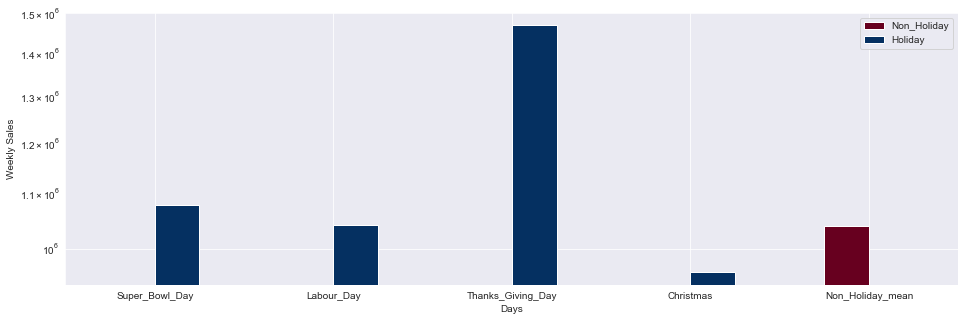

In [16]:
# Second Try
# Assign holidays in table
# Holidays
Super_Bowl = ["12-2-2010","11-2-2011","10-2-2012"]
Labour_Day = ["10-9-2010","9-9-2011","7-9-2012"]
ThanksGivingDay = ["26-11-2010","25-11-2011","23-11-2012"]
Christmas = ["31-12-2010","30-12-2011","28-12-2012"]
# Put it into the Walmart data
walmart["Super_Bowl_Day"] = (walmart.loc[walmart.Date.isin(Super_Bowl)])["Weekly_Sales"]
walmart["Labour_Day"] = (walmart.loc[walmart.Date.isin(Labour_Day)])["Weekly_Sales"]
walmart["Thanks_Giving_Day"]= (walmart.loc[walmart.Date.isin(ThanksGivingDay)])["Weekly_Sales"]
walmart["Christmas"]= (walmart.loc[walmart.Date.isin(Christmas)])["Weekly_Sales"]
walmart["Non_Holiday_mean"] = walmart[walmart["Holiday_Flag"]==0]["Weekly_Sales"]
Compare_Between_every_Holiday= walmart.groupby("Holiday_Flag")[["Super_Bowl_Day","Labour_Day","Thanks_Giving_Day","Christmas"
                                                                ,"Non_Holiday_mean"]].agg(np.mean).T
Compare_Between_every_Holiday.columns = ["Non_Holiday","Holiday"]
Compare_Between_every_Holiday.fillna("False Value")
Compare_Between_every_Holiday.plot(kind="bar",rot=360,ylabel="Weekly Sales",xlabel="Days",logy=True,figsize=(16,5),colormap="RdBu")
plt.show()

##### __Then Notice again that the "Thank's Giving day" Was the best day in renvue, then "Super Bowl" then "Labour" , and Christmas in last__

<AxesSubplot:xlabel='Year'>

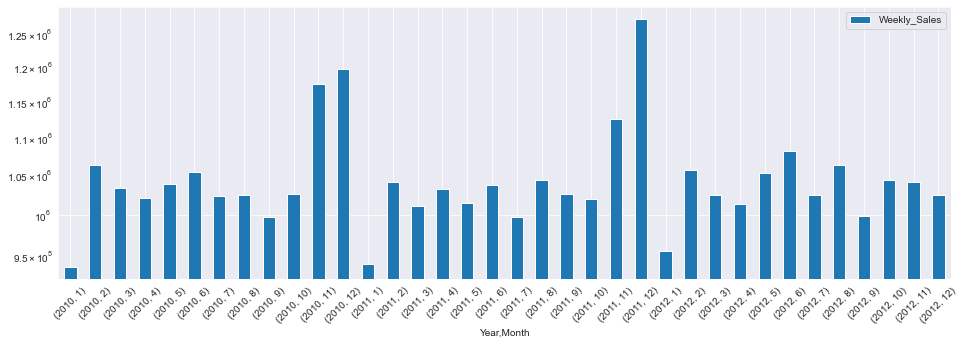

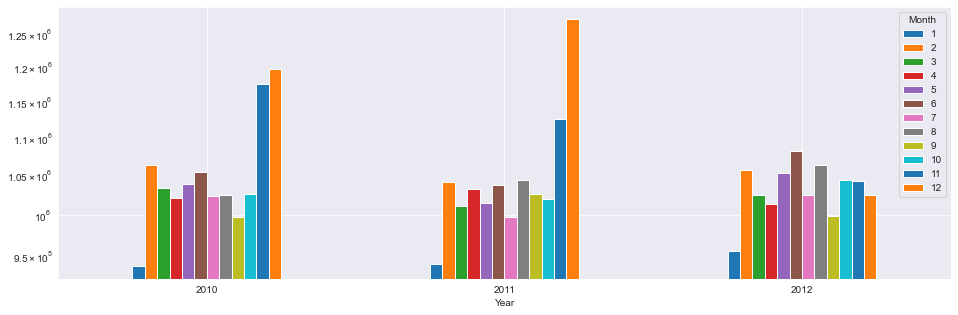

In [13]:
Most_Higher_Sales = walmart.groupby(["Year","Month"])["Weekly_Sales"].agg(np.mean).to_frame()
Most_Higher_Sales.plot(kind="bar",rot=45,figsize=(16,5),logy=True)
Most_Higher_Sales_Pivoted = pd.pivot_table(data=walmart,index="Year",columns="Month",values="Weekly_Sales",aggfunc=np.mean)
Most_Higher_Sales_Pivoted.plot(kind="bar",figsize=(16,5),rot=360,logy=True)